<a href="https://colab.research.google.com/github/m1-oh/For-study-deeplearning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

print(keras.__version__)

2.5.0


In [13]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(test_images.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
uint8


mnist의 load_data 메소드를 사용하게 되면 (x_train, y_train),(x_test, y_test)의 형태를 가진 튜플이 나오게 된다. 따라서 저렇게 데이터를 받아주는 것.

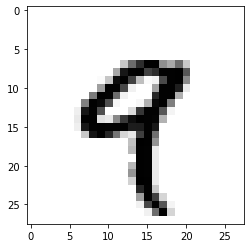

In [3]:
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

두 개의 Dense 층을 추가해준 것. 
Sequential 모델은 layer들을 선형적으로 연결합니다. '.add()'로 쉽게 layer를 추가할 수 있습니다.
첫번째 층에서만 입력형태에 대한 정보를 필요로 합니다.(두번째부터는 자동으로 형태를 맞추기 때문.)
input_shape는 배치차원은 포함하지 않습니다. 즉, 각 배치의 형태만 넣어주면 됩니다. (위 예시의 경우 28 * 28)(data tensor에서 가장 첫번째 요소를 말하는 듯 합니다.)


In [ ]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

먼저 compile 메소드는 학습의 환경을 설정하는 메소드입니다. 이 안의 변수들에 대해 설명하면
 optimizer에선 Optimizer 클래스의 인스턴스를 사용할 수 있고, 'rmsprp'나 'adagrad'는 기존 optimizer에 대한 문자열(이름) 입니다.
  loss는 최적화에 사용되는 손실 함수로, 'categorical_crossentropy', 'mse' 같은 기존의 손실 함수의 문자열(이름) 또는 손실 함수를 사용할 수 있습니다.
  metric 리스트는 훈련과 테스트 과정을 모니터링할 지표를 담는 리스트라고 생각하면 될 것 같습니다. 문자열(이름) 또는 사용자 정의 기준 함수를 사용할 수 있습니다.

In [10]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

 훈련을 시작하기 전에 입력할 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 [0,1]의 범위로 수정해줘야합니다.(전처리 과정/preprocessing) 훈련 이미지는 [0,255] 사이의 uint8 값으로 저장되어 있으므로 255로 나눠준 것입니다. 또한 dtype도 'float32'로 바꾸어줘야 합니다.
  레이블은 범주형으로 인코딩해줘야 한다는데 뒤에 배우게 될 것 같습니다.

In [24]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=64)

NameError: ignored

 케라스에서는 fit 메서드를 통해서 훈련 데이터에 모델을 학습시킵니다! train_images와 train_labels를 넣어줘서 mapping을 할 수 있게 해주고, epochs에 넣은 정수 횟수만큼 훈련을 반복합니다. 

In [26]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_loss)
print(test_acc)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.4266 - accuracy: 0.8775
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1078 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0702 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0464 - accuracy: 0.9867
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9792
0.07521307468414307
0.979200005531311


 evaluate 메서드는 테스트 인풋과 타겟(라벨)을 넣어주면 테스트 모드에서 loss value와 metrices value(여기선 accuracy)를 리턴해줍니다.